<a href="https://colab.research.google.com/github/Shravinya/Deep-Learning/blob/main/Module_3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3.a)Task 1: Build a CNN Model for MNIST Classification
### Steps for MNIST CNN Classification  

1. **Data Preprocessing** – Load MNIST dataset, normalize pixel values, reshape input data, and apply one-hot encoding to labels.  
2. **Model Definition** – Build a CNN with convolutional, max pooling, flatten, and dense layers for digit classification.  
3. **Compilation & Training** – Compile the model with Adam optimizer, train it using categorical cross-entropy loss, and validate on test data.  
4. **Evaluation & Visualization** – Evaluate model performance on the test set and plot training vs validation accuracy and loss.  


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9090 - loss: 0.2948 - val_accuracy: 0.9853 - val_loss: 0.0427
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9856 - loss: 0.0450 - val_accuracy: 0.9889 - val_loss: 0.0315
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9911 - loss: 0.0275 - val_accuracy: 0.9882 - val_loss: 0.0365
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9940 - loss: 0.0193 - val_accuracy: 0.9897 - val_loss: 0.0302
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9952 - loss: 0.0144 - val_accuracy: 0.9909 - val_loss: 0.0289
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9879 - loss: 0.0376
Test Accuracy: 0.9909


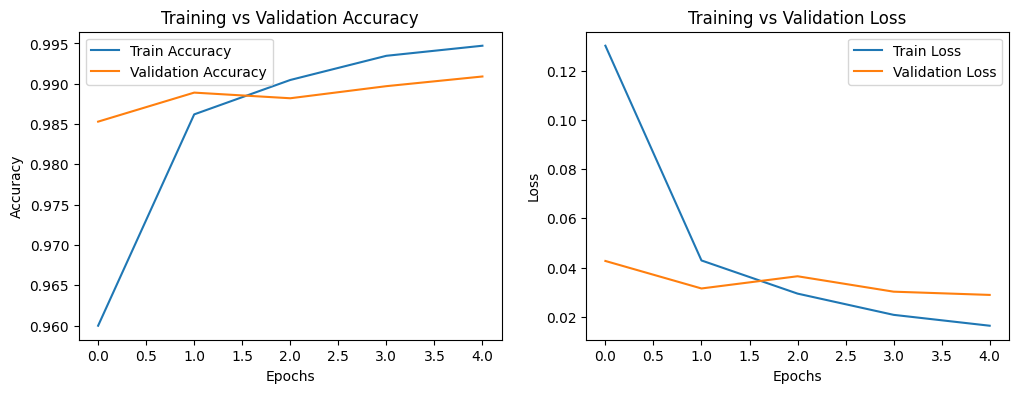

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# 1.1 Load and Preprocess the Dataset
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to [0,1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape data to fit CNN input (28x28 grayscale images with 1 channel)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Convert labels to categorical (one-hot encoding)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# 1.2 Define a Basic CNN Model
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 1.3 Compile and Train the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32)

# 1.4 Evaluate the Model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Plot Training vs Validation Accuracy and Loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()


### Steps for Improved MNIST CNN Classification  

1. **Data Preprocessing** – Load the MNIST dataset, normalize pixel values, reshape input data for CNN, and apply one-hot encoding to labels.  
2. **Model Enhancement** – Introduce L2 regularization, batch normalization, and dropout layers to improve generalization and prevent overfitting.  
3. **Compilation & Training** – Compile the model using the Adam optimizer, train it with categorical cross-entropy loss, and validate on the test set.  
4. **Evaluation & Visualization** – Evaluate the improved model on the test dataset and plot training vs validation accuracy and loss.  


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.3109 - loss: 2.5446 - val_accuracy: 0.4531 - val_loss: 1.9208
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4973 - loss: 1.7276 - val_accuracy: 0.5867 - val_loss: 1.4420
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5649 - loss: 1.5149 - val_accuracy: 0.5647 - val_loss: 1.5493
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6028 - loss: 1.4093 - val_accuracy: 0.6153 - val_loss: 1.3935
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6360 - loss: 1.3437 - val_accuracy: 0.6665 - val_loss: 1.2533
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6468 - loss: 1.3090 - val_accuracy: 0.5761 - val_loss: 1.4776
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6571 - loss: 1.2892 - val_accuracy: 0.6900 - val_loss: 1.2051
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6610 - loss: 1.2816 - val_accuracy: 

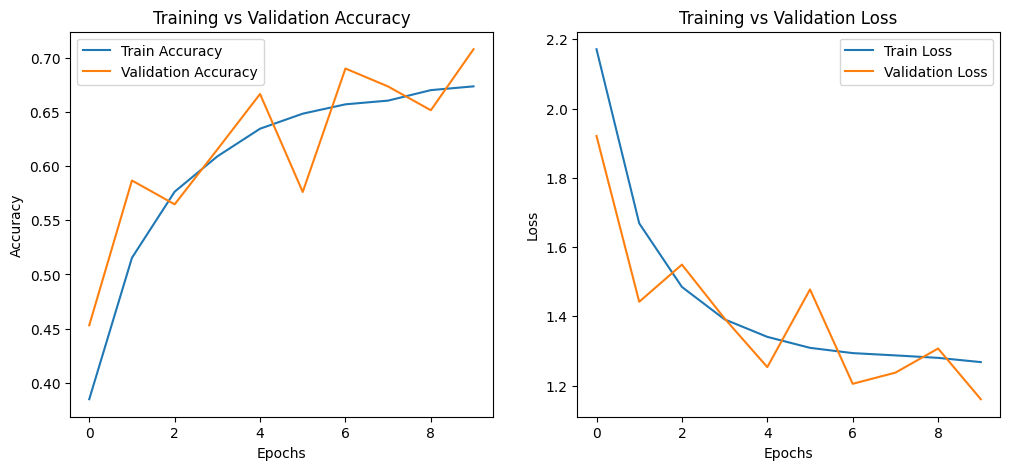

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the images
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode labels
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

# Define the improved CNN model
def create_improved_cnn():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', kernel_regularizer=l2(0.001), padding='same', input_shape=(32,32,3)),
        BatchNormalization(),
        MaxPooling2D((2,2)),
        Dropout(0.3),

        Conv2D(64, (3,3), activation='relu', kernel_regularizer=l2(0.001), padding='same'),
        BatchNormalization(),
        MaxPooling2D((2,2)),
        Dropout(0.4),

        Conv2D(128, (3,3), activation='relu', kernel_regularizer=l2(0.001), padding='same'),
        BatchNormalization(),
        MaxPooling2D((2,2)),
        Dropout(0.5),

        Flatten(),
        Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Create the model
model = create_improved_cnn()

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=64)

# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Plot training vs validation accuracy and loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')

plt.show()
